# Cybersecurity RAG Evaluation Notebook

This notebook allows for an interactive evaluation of the RAG pipeline. It performs the same function as `scripts/run_evaluation.py` but provides a step-by-step execution with visible logs and outputs, including a confusion matrix chart.

In [1]:
!rm -rf /kaggle/working/*

In [2]:
!git clone https://github.com/luthfiarifin/rag-cybersecurity-eval code
!mv code/* .
!ls

Cloning into 'code'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 75 (delta 23), reused 71 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 2.80 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (23/23), done.
1_build_vector_store.ipynb  app.py  data       requirements.txt
2_evaluation.ipynb	    code    readme.md  src


### Setup Environment

In [3]:
!pip install -r requirements.txt

  Using cached sentence_transformers-2.7.0-py3-none-any.whl.metadata (11 kB)
  Using cached tokenizers-0.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached transformers-4.38.2-py3-none-any.whl.metadata (130 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 107.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 4.1.0
    Uninstalling sente

### Import Libraries and Load Configuration

In [4]:
# !pip install numpy==1.26.4

import sys
import os
import pandas as pd
from dotenv import load_dotenv
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

from src.config import Config
from src.rag_pipeline.graph import build_rag_graph
from src.evaluation.evaluator import evaluate_performance


print("Libraries and configuration loaded.")

Libraries and configuration loaded.


### Run Evaluation

In [5]:
# !pip install sentence-transformers==2.7.0
# !pip install transformers==4.41.2
# !pip install torch==2.3.1

# !pip show sentence-transformers

--- REWRITING QUERY ---
Rewritten Query: In exploit development, which vulnerability type is typically used by attackers to execute arbitrary code by manipulating variables that influence memory allocation sizes?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/kaggle/working/src/vector_store/builder.py:12: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  return HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In exploit development, attackers typically use Memory safety vulnerabilities, specifically buffer overflows or over-reads, to execute arbitrary code by manipulating variables that influence memory al...
--- REWRITING QUERY ---
Rewritten Query: In the context of malware analysis, which technique is most effective at evading signature-based antivirus detection while maintaining the original functionality of the malware?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of malware analysis, techniques such as polymorphism or metamorphism are most effective at evading signature-based antivirus detection while maintaining the original functionality of th...
--- REWRITING QUERY ---
Rewritten Query: In the context of an advanced persistent threat (APT) campaign against a highly secure network, what technique would most likely be used initially by red team operators to maintain stealth while gathering critical information?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of an advanced persistent threat (APT) campaign against a highly secure network, the technique that would most likely be used initially by red team operators to maintain stealth while g...
--- REWRITING QUERY ---
Rewritten Query: During a red team operation, if the target system runs an old version of Apache web server (2.2.31), which penetration testing technique would likely be the most effective?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Based on the provided context, it is not possible to determine the most effective penetration testing technique for a specific Apache web server version (2.2.31) during a red team operation. The conte...
--- REWRITING QUERY ---
Rewritten Query: In the context of network-level exploits, which vulnerability specifically relies on the misuse of the SMB protocol by Windows systems for its exploitation?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: I apologize, but based on the provided context, I cannot formulate a comprehensive answer to the question. The context only discusses buffer overflow vulnerabilities and their exploitation, but it doe...
--- REWRITING QUERY ---
Rewritten Query: During a red team assessment, what type of vulnerability would most likely be exploited if an attacker seeks to manipulate session IDs to masquerade as an authenticated user?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: During a red team assessment, if an attacker seeks to manipulate session IDs to masquerade as an authenticated user, the type of vulnerability that would most likely be exploited is a credential hunti...
--- REWRITING QUERY ---
Rewritten Query: When preparing for the exploitation phase of a targeted cyber-attack, which method is most effective for identifying unknown vulnerabilities or bugs in a custom-built enterprise application?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: When preparing for the exploitation phase of a targeted cyber-attack, using a vulnerability scanning tool such as OpenVAS is an effective method for identifying unknown vulnerabilities or bugs in a cu...
--- REWRITING QUERY ---
Rewritten Query: In a red team operation aimed at assessing network vulnerabilities, which tool is most appropriate for conducting a comprehensive penetration test by exploiting known vulnerabilities?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In a red team operation aimed at assessing network vulnerabilities, Metasploit is the most appropriate tool for conducting a comprehensive penetration test by exploiting known vulnerabilities. Metaspl...
--- REWRITING QUERY ---
Rewritten Query: In the context of buffer overflow vulnerabilities, which technique involves corrupting the execution stack of a program by overwriting the stack's return pointer?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of buffer overflow vulnerabilities, the technique that involves corrupting the execution stack of a program by overwriting the stack's return pointer is called "By overwriting the retur...
--- REWRITING QUERY ---
Rewritten Query: Which technique can be effectively used as a defense mechanism against buffer overflow attacks by detecting attempts to overwrite the return address?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Buffer overflow protection can be effectively used as a defense mechanism against buffer overflow attacks by detecting attempts to overwrite the return address. This protection works by checking that ...
--- REWRITING QUERY ---
Rewritten Query: Which attack technique can be used to circumvent the Same-Origin Policy and gain unauthorized access to a victim's locale network by exploiting the trust relationship between the web browser and server?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: The attack technique that can be used to circumvent the Same-Origin Policy and gain unauthorized access to a victim's local network by exploiting the trust relationship between the web browser and ser...
--- REWRITING QUERY ---
Rewritten Query: In the context of exploit development, which technique is specifically designed to bypass modern memory protection mechanisms such as DEP (Data Execution Prevention)?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of exploit development, the technique specifically designed to bypass modern memory protection mechanisms such as DEP (Data Execution Prevention) is the "Non executable stack bypass" te...
--- REWRITING QUERY ---
Rewritten Query: In the context of web application security, which vulnerability could allow an attacker to execute arbitrary commands on the server by manipulating user-supplied input?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of web application security, an arbitrary code execution (ACE) vulnerability could allow an attacker to execute arbitrary commands on the server by manipulating user-supplied input. Thi...
--- REWRITING QUERY ---
Rewritten Query: During a red team operation, which tool allows experienced attackers to use a robust post-exploitation framework that facilitates long-term access and provides comprehensive command and control capabilities?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Unfortunately, the provided context blocks do not mention a specific tool that allows experienced attackers to use a robust post-exploitation framework that facilitates long-term access and provides c...
--- REWRITING QUERY ---
Rewritten Query: During an internal red team exercise, which tool would be most effective for extracting plaintext passwords and hash dumps from a memory captured in a Windows environment?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Based on the provided context, there is no specific tool mentioned that can be used to extract plaintext passwords and hash dumps from a memory captured in a Windows environment. However, it is mentio...
--- REWRITING QUERY ---
Rewritten Query: During a red team operation, which vulnerability should be exploited to achieve remote code execution on a Windows 7 system without any user interaction?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Unfortunately, based on the provided context, it is not possible to determine a specific vulnerability that can be exploited to achieve remote code execution on a Windows 7 system without any user int...
--- REWRITING QUERY ---
Rewritten Query: What is an effective technique used by advanced malware to avoid detection and analysis when being examined in a typical virtualized security research environment?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: An effective technique used by advanced malware to avoid detection and analysis when being examined in a typical virtualized security research environment is environmental awareness. This technique in...
--- REWRITING QUERY ---
Rewritten Query: In the context of exploit development, which technique is primarily used to bypass DEP (Data Execution Prevention) and is often combined with Return-Oriented Programming (ROP) to execute arbitrary code?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of exploit development, the technique primarily used to bypass DEP (Data Execution Prevention) is to reuse existing code by pointing the overwritten return address (the instruction poin...
--- REWRITING QUERY ---
Rewritten Query: In a red team operation, what would be the most effective method to maintain persistence on a compromised machine?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In a red team operation, the most effective method to maintain persistence on a compromised machine would be through credential hunting. This involves scouring the compromised computer for credentials...
--- REWRITING QUERY ---
Rewritten Query: During a red team exercise, if the objective is to gain remote code execution on an internal server running proprietary software that interprets incoming network data, which vulnerability would be most strategically appropriate to exploit?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Based on the context provided, the most strategically appropriate vulnerability to exploit in this scenario would be a stack buffer overflow. This is because the proprietary software interprets incomi...
--- REWRITING QUERY ---
Rewritten Query: In the context of penetration testing, if an attacker aims to uncover buffer overflow vulnerabilities in a proprietary software application, which technique would be most effective?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of penetration testing, if an attacker aims to uncover buffer overflow vulnerabilities in a proprietary software application, the most effective technique would be fuzzing. According to...
--- REWRITING QUERY ---
Rewritten Query: In a red team operation, which tool is most appropriate for conducting advanced payload crafting and exploitation during an assessment?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Unfortunately, based on the provided context, there is no mention of a tool specifically designed for advanced payload crafting and exploitation during a red team operation. The context primarily focu...
--- REWRITING QUERY ---
Rewritten Query: In advanced red team engagements, what technique is most effective for maintaining stealth while ensuring persistent access and control over a compromised system?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: Based on the provided context, the technique most effective for maintaining stealth while ensuring persistent access and control over a compromised system is credential hunting, specifically using tec...
--- REWRITING QUERY ---
Rewritten Query: In the context of malware analysis, what technique poses a significant challenge to static analysis methods by constantly changing the binary's signature?
--- RETRIEVING AND RERANKING DOCUMENTS ---
Initializing embedding model: BAAI/bge-large-en-v1.5


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieved and reranked to 5 documents.
--- GENERATING ANSWER ---
Generated Answer: In the context of malware analysis, polymorphism and metamorphism are techniques that pose a significant challenge to static analysis methods by constantly changing the binary's signature. These techn...
--- Starting Evaluation ---

--- Quantitative Metrics Summary ---
Accuracy: 0.0000
F1 Score (Macro): 0.0000
Average BLEU Score: 0.0000
Hallucination Rate: Not calculated (context unavailable)

--- Detailed Comparison Log ---


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

| Question                                                                                                                                                                                                                                        | Correct Answer                                                                       | Predicted Answer                                                      | Is Correct?   |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------|:----------------------------------------------------------------------|:--------------|
| In exploit development, which vulnerability type is typically used by attackers to execute arbitrary code by manipulating variables that influence memory alloca

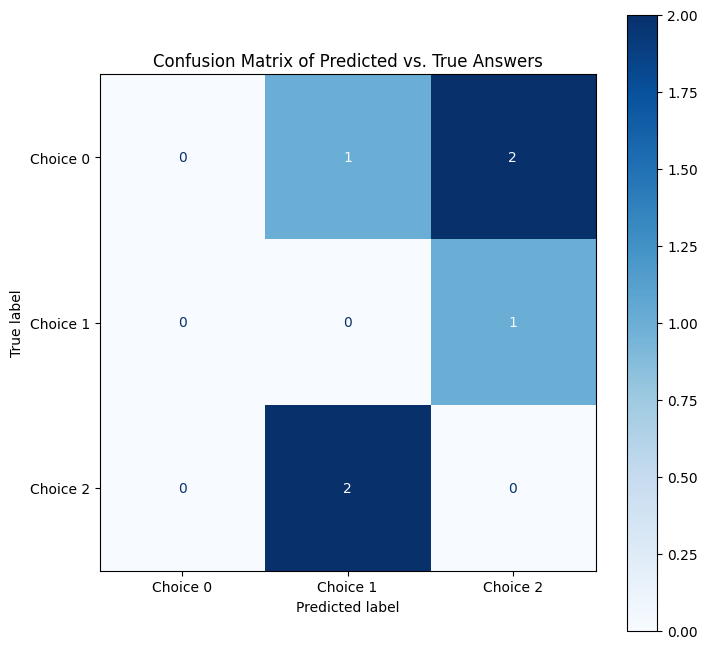

In [6]:
USE_KAGGLE = True

if USE_KAGGLE:
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()

    Config.GROQ_API_KEY = user_secrets.get_secret("GROQ_API_KEY")
    Config.MONGO_URI = user_secrets.get_secret("MONGO_URI")

# Check for API key before running
if not Config.GROQ_API_KEY:
    print("GROQ_API_KEY is not set in the .env file. Evaluation cannot proceed.")
elif not Config.MONGO_URI:
    logging.error("MONGO_URI is not set in the .env file. Evaluation cannot proceed.")
else:
    # Load a sample of the eval dataset
    try:
        eval_df = pd.read_csv(Config.EVAL_DATA_PATH)
        # Use a small sample for quick testing, you can increase the fraction
        sample_df = eval_df.sample(frac=0.1, random_state=42)
        logging.info(f"Loaded {len(sample_df)} samples from {Config.EVAL_DATA_PATH}")
    except FileNotFoundError:
        logging.error(f"Evaluation file not found at {Config.EVAL_DATA_PATH}")
        sample_df = None

    if sample_df is not None:
        app = build_rag_graph()
        
        questions = []
        generated_answers = []
        ground_truths = []
        choices_list = []

        logging.info(f"Running evaluation on {len(sample_df)} samples...")
        # Use iterrows() for DataFrame iteration in a notebook for clarity
        for index, row in sample_df.iterrows():
            logging.info(f"Processing sample {index+1}/{len(sample_df)}: Question ID {row.name}")
            
            question = row["question"]
            ground_truth_choice = row["answer"]
            choices = row["choices"]
            
            # The input to the graph is a dictionary with keys matching the RAGState
            inputs = {"query": question, "conversation_history": ""}
            result = app.invoke(inputs)
            
            questions.append(question)
            generated_answers.append(result["answer"])
            ground_truths.append(ground_truth_choice)
            choices_list.append(choices)

        # Run the final evaluation and print the report
        evaluate_performance(questions, generated_answers, ground_truths, choices_list)